320x240
85.07435796566355


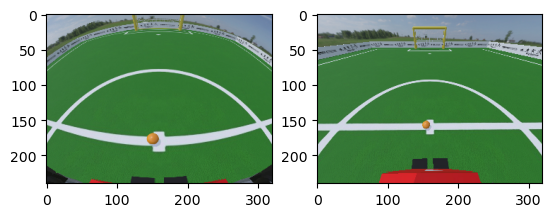

In [1]:
%matplotlib inline
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt

fov = 2.1642 #多分水平方向の視野角だと思う

img = cv2.imread('image.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img_nodist = cv2.imread('image_nodist.png')
img_nodist = cv2.cvtColor(img_nodist, cv2.COLOR_BGR2RGB)

imw = img.shape[1]
imh = img.shape[0]
print(f'{imw}x{imh}')

cx = imw/2
cy = imh/2

focal = (imw/2) / math.tan(fov/2)
print(f'{focal}')
vfov = fov * imh / imw
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.imshow(img_nodist)

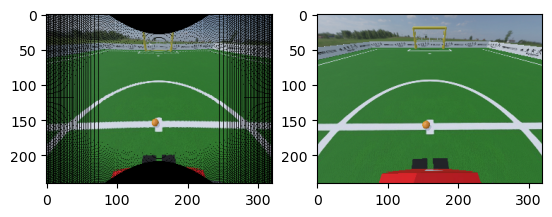

In [2]:
# transform cylindrical projection -> pinhole

img4 = np.zeros((imh, imw, 3), dtype=np.uint8)

for y in range(imh):
    for x in range(imw):
        u_s = (x - cx)
        v_s = (y - cy)
        th = u_s/(imw/2)*(fov/2)
        ph = v_s/(imh/2)*(vfov/2)
        u_p = math.tan(th) * focal
        v_p = math.tan(ph) * math.hypot(focal, u_p)
        x_p = u_p + cx
        y_p = v_p + cy
        #print(f'{th} {u_p} {v_p} -> {x} {y}')
        if 0 < x_p < imw and 0 < y_p < imh:
            img4[int(y_p), int(x_p), :] = img[y, x, :]
            
plt.subplot(1, 2, 1)
plt.imshow(img4)
plt.subplot(1, 2, 2)
plt.imshow(img_nodist)

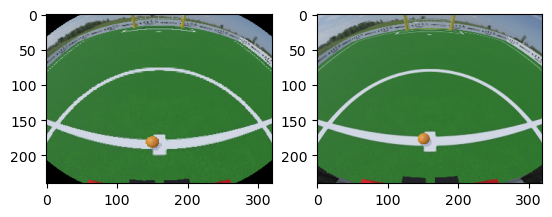

In [3]:
# transform cylindrical projection -> pinhole (reverse to fill)

img3 = np.zeros((imh, imw, 3), dtype=np.uint8)

for y in range(imh):
    for x in range(imw):
        u_s = (x - cx)
        v_s = (y - cy)
        th = u_s/(imw/2)*(fov/2)
        ph = v_s/(imh/2)*(vfov/2)
        u_p = math.tan(th) * focal
        v_p = math.tan(ph) * math.hypot(focal, u_p)
        x_p = u_p + cx
        y_p = v_p + cy
        #print(f'{th} {u_p} {v_p} -> {x} {y}')
        if 0 < x_p < imw and 0 < y_p < imh:
            img3[y, x, :] = img_nodist[int(y_p), int(x_p), :]
            
plt.subplot(1, 2, 1)
plt.imshow(img3)
plt.subplot(1, 2, 2)
plt.imshow(img)

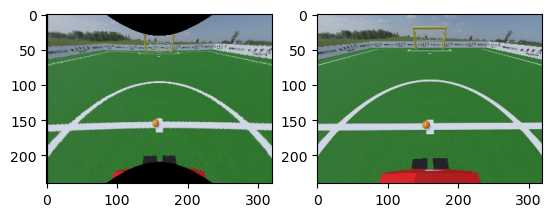

In [4]:
# transform pihole -> cylindrical projection (reverse to fill)
img2 = np.zeros((imh, imw, 3), dtype=np.uint8)

for y in range(imh):
    for x in range(imw):
        u = (x - cx)
        v = (y - cy)
        th_p = math.atan2(u, focal)
        ph_p = math.atan2(v, math.hypot(u, focal))
        u_s = th_p/(fov/2) * imw/2
        v_s = ph_p/(vfov/2) * imh/2
        x_s = int(u_s + cx)
        y_s = int(v_s + cy)
        #print(f'{th_p} {u_s} {v_s} -> {x} {y}')
        if 0 < x_s < imw and 0 < y_s < imh:
            img2[y, x, :] = img[y_s, x_s, :]
            
plt.subplot(1, 2, 1)
plt.imshow(img2)
plt.subplot(1, 2, 2)
plt.imshow(img_nodist)